# Attribute Information→

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

12 - quality (score between 0 and 10)


# Loading the Library

In [1]:
from pyforest import *
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading the Datset

In [2]:
df=pd.read_csv("C:/Users/HP/Desktop/Data Trained/RedWine.csv")

<IPython.core.display.Javascript object>

In [3]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
df.shape

(1599, 12)

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
#checking the data types of each columns
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Observation→ we can see from the Above that we ahave 2 dtypes of datypes i al caloumns When All columns Are Float ,othehand Quality columns is int type



In [7]:
#checking the Info of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
#Lets Checking the Null Values
df.isnull().values.any()

False

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<IPython.core.display.Javascript object>

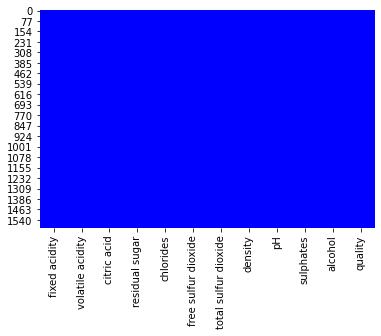

In [10]:
#lets plot a heamap to chek the Nan values
sns.heatmap(df.isnull(),cbar=False,cmap='winter')

In [11]:
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

In [12]:
df.iplot()

In [13]:
#checking the Target Variable
df.quality.value_counts().iplot()

In [14]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [15]:
df.quality.value_counts(normalize=True)

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

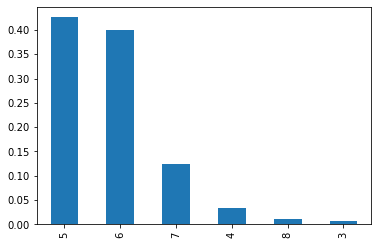

In [16]:
df.quality.value_counts(normalize=True).plot(kind='bar')

In [17]:
#lets convert all qualities into bad and Good * respect to problem Statment
#Binary Classification
df['quality']=df['quality'].replace({7:1, 8:1,3: 0, 4:0, 5: 0,6:0})

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

0    0.86429
1    0.13571
Name: quality, dtype: float64


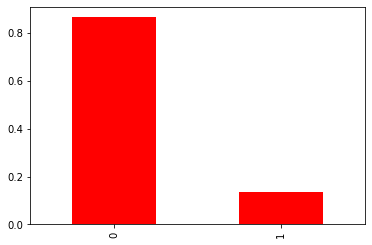

In [18]:
df.quality.value_counts(normalize=True).plot(kind='bar',color='r')
print(df.quality.value_counts(normalize=True))

In [19]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

# DataSet Balancing

In [20]:
count_class_0, count_class_1 = df.quality.value_counts()
df_class_0 = df[df['quality'] == 0]
df_class_1 = df[df['quality'] == 1]
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.quality.value_counts())

<IPython.core.display.Javascript object>

Random over-sampling:
1    1382
0    1382
Name: quality, dtype: int64


In [21]:
df=df_test_over.copy()

1    0.5
0    0.5
Name: quality, dtype: float64


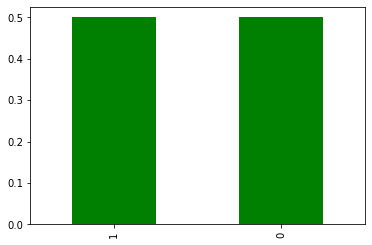

In [22]:
df.quality.value_counts(normalize=True).plot(kind='bar',color='g')
print(df.quality.value_counts(normalize=True))
df.quality.value_counts().iplot()

In [23]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    2764.000000       2764.000000  2764.000000     2764.000000   
mean        8.531693          0.475376     0.316006        2.601085   
std         1.891293          0.175386     0.200834        1.381357   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.200000          0.340000     0.130000        1.900000   
50%         8.200000          0.440000     0.330000        2.200000   
75%         9.800000          0.590000     0.470000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  2764.000000          2764.000000           2764.000000  2764.000000   
mean      0.082658            15.100760             41.982272     0.996394   
std       0.041491            10.388102             34.636480     0.002090   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.066000             7.000000             19.000000     0.995140   
50%       0.076500            12.000000             32.000000     0.996400   
75%       0.088000            20.000000             53.000000     0.997600   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol     quality  
count  2764.000000  2764.000000  2764.000000  2764.00000  
mean      3.300572     0.692033    10.904746     0.50000  
std       0.156764     0.161090     1.189701     0.50009  
min       2.740000     0.330000     8.400000     0.00000  
25%       3.200000     0.580000     9.900000     0.00000  
50%       3.300000     0.670000    10.900000     0.50000  
75%       3.390000     0.770000    11.800000     1.00000  
max       4.010000     2.000000    14.900000     1.00000

In [24]:
from scipy.stats import kurtosis
#lets define a function to see all kind of statistic data,nan values and IQR also
def stats(df):
    for i in df.columns:#getting All the columns in for Loop
        if df[i].dtypes!='object':# checking the columns Dtypes if it's not in objective then it will go forward→
            k=df[i]#declaring the variable
            cvar=k.mean()/k.std()#Coefficient of variation (CV)
            standard=k.std()#standard deviation
            krts=kurtosis(k)#Kurtosis
            #https://corporatefinanceinstitute.com/resources/knowledge/other/kurtosis/#:~:text=Kurtosis%20is%20a%20statistical%20measure,given%20distribution%20contain%20extreme%20values.
            m=k.mean()#mean
            mad=k.mad()#Median Absolute Deviation (MAD)
            skew=k.skew()#skewness
            variance=k.var()#variance
            Range=k.max()-k.min()#Range
            #Iqr
            Q1 = k.quantile(0.25)
            Q3 = k.quantile(0.75)
            IQR = Q3 - Q1
            des=df[i].describe()
            #making a Dtaa frame with above Data
            st=pd.DataFrame({"standard deviation":[standard],"Coefficient of variation":[cvar],
                             "Kurtosis":[krts],"mean":[m],"Median Absolute Deviation":[mad],
                             "skewness":[skew],"Variance":[variance],"Range":[Range],"IQR":[IQR]})
            print("column Name→→",i)
            print("Dtype=",df[i].dtype)
            print("\n")
            if df[i].skew()>0.55:
                print("This column Have Positive skewd Data")
            if df[i].skew()<-0.55:
                    print("This column Have Negetive skewd Data")
            print("\n")
            print(st)
            sns.set_style("whitegrid")
            sns.distplot(df[i], kde=True)
            plt.plot(skew,color='red',label=skew)
            plt.legend()
            st.plot(kind='bar')
            plt.show()
            print("column Describe")
            print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
            print(des)
            des.plot(kind='bar',color='red')
            plt.xticks(rotation=75)
            plt.show()
            print("\n")
            print("\n")
            print("\n")
        else:
            v=df[i].value_counts()
            print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
            print("Value Counts of column")
            print("\n")
            print(v)
            sns.countplot(x=df[i],data=df)
            print("columns Name→→",i)
            print("Dtype =",df[i].dtype)
            plt.xticks(rotation=75)
            plt.show()
            print("\n")
            print("\n")
            print("\n")
        nan=df[i].isnull().sum()    
        Nan=nan/len(df[i])
        if Nan ==0.0:
            print("No Nan Values Are Present")
            print("\n")
            print("\n")
        else:
            print("NaN Value % → →",Nan)
            print(nan,"    Nan values are present")
            print("\n")
            print("\n")
        print("►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►")

<IPython.core.display.Javascript object>

column Name→→ fixed acidity
Dtype= float64


This column Have Positive skewd Data


   standard deviation  Coefficient of variation  Kurtosis      mean  \
0            1.891293                  4.511037  0.550607  8.531693   

   Median Absolute Deviation  skewness  Variance  Range  IQR  
0                    1.50642  0.731712   3.57699   11.3  2.6  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

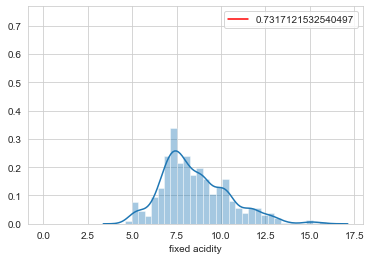

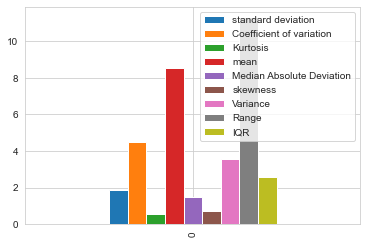

column Describe
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
count    2764.000000
mean        8.531693
std         1.891293
min         4.600000
25%         7.200000
50%         8.200000
75%         9.800000
max        15.900000
Name: fixed acidity, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

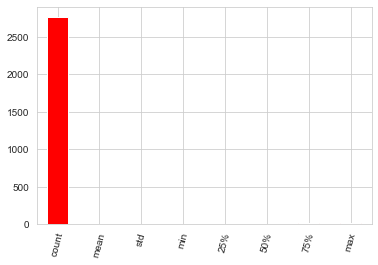







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►


<IPython.core.display.Javascript object>

column Name→→ volatile acidity
Dtype= float64


This column Have Positive skewd Data


   standard deviation  Coefficient of variation  Kurtosis      mean  \
0            0.175386                  2.710455    1.1434  0.475376   

   Median Absolute Deviation  skewness  Variance  Range   IQR  
0                   0.142244  0.814051   0.03076   1.46  0.25  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

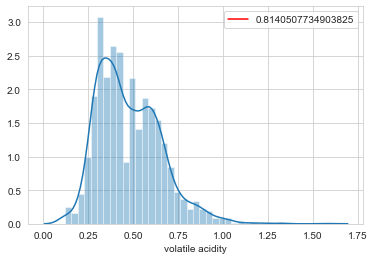

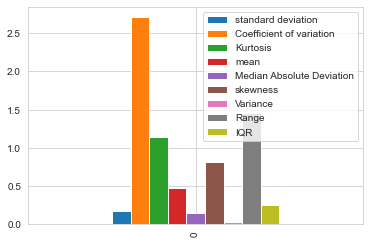

column Describe
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
count    2764.000000
mean        0.475376
std         0.175386
min         0.120000
25%         0.340000
50%         0.440000
75%         0.590000
max         1.580000
Name: volatile acidity, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

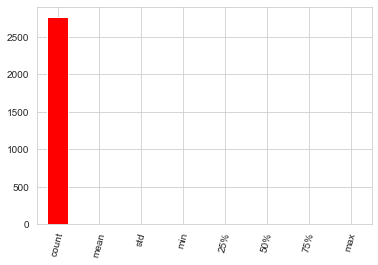







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►


<IPython.core.display.Javascript object>

column Name→→ citric acid
Dtype= float64




   standard deviation  Coefficient of variation  Kurtosis      mean  \
0            0.200834                  1.573471 -0.902646  0.316006   

   Median Absolute Deviation  skewness  Variance  Range   IQR  
0                   0.168612  0.015381  0.040334    1.0  0.34  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

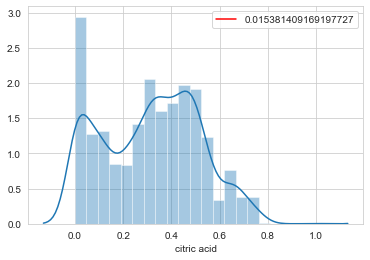

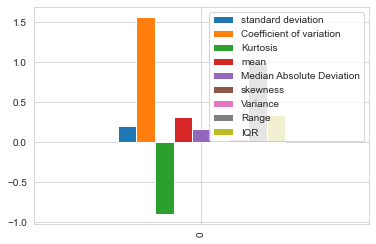

column Describe
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
count    2764.000000
mean        0.316006
std         0.200834
min         0.000000
25%         0.130000
50%         0.330000
75%         0.470000
max         1.000000
Name: citric acid, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

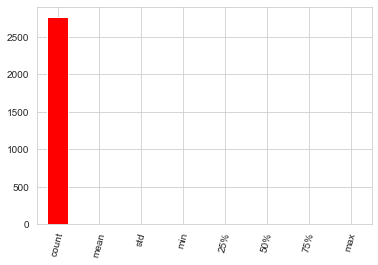







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►


<IPython.core.display.Javascript object>

column Name→→ residual sugar
Dtype= float64


This column Have Positive skewd Data


   standard deviation  Coefficient of variation   Kurtosis      mean  \
0            1.381357                  1.882993  19.597401  2.601085   

   Median Absolute Deviation  skewness  Variance  Range  IQR  
0                   0.816613  3.660987  1.908148   14.6  0.7  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

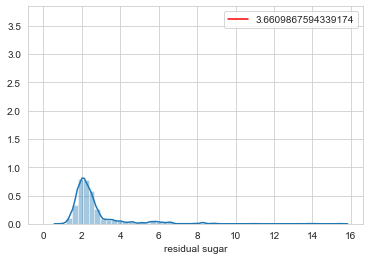

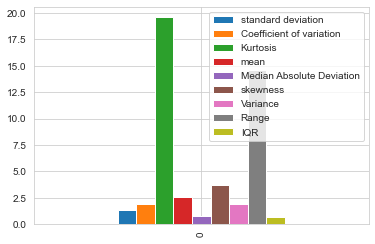

column Describe
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
count    2764.000000
mean        2.601085
std         1.381357
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

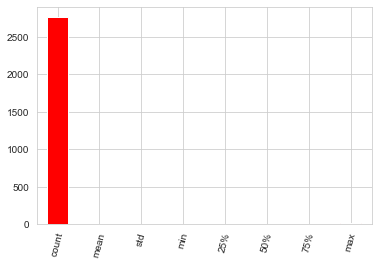







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►


<IPython.core.display.Javascript object>

column Name→→ chlorides
Dtype= float64


This column Have Positive skewd Data


   standard deviation  Coefficient of variation   Kurtosis      mean  \
0            0.041491                  1.992199  47.799548  0.082658   

   Median Absolute Deviation  skewness  Variance  Range    IQR  
0                   0.019726  5.886658  0.001721  0.599  0.022  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

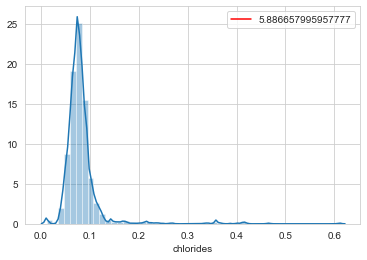

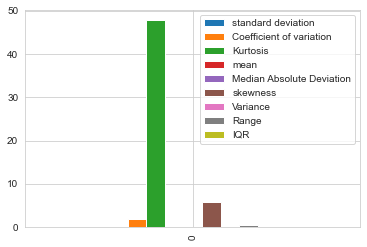

column Describe
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
count    2764.000000
mean        0.082658
std         0.041491
min         0.012000
25%         0.066000
50%         0.076500
75%         0.088000
max         0.611000
Name: chlorides, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

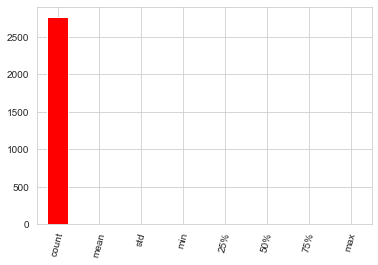







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►


<IPython.core.display.Javascript object>

column Name→→ free sulfur dioxide
Dtype= float64


This column Have Positive skewd Data


   standard deviation  Coefficient of variation  Kurtosis      mean  \
0           10.388102                  1.453659     1.898  15.10076   

   Median Absolute Deviation  skewness    Variance  Range   IQR  
0                   8.082484   1.31479  107.912663   71.0  13.0  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

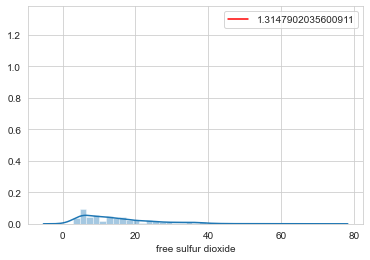

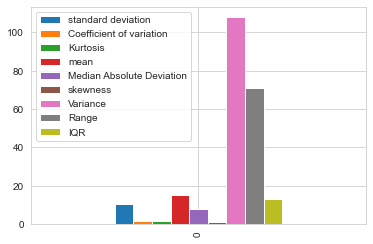

column Describe
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
count    2764.000000
mean       15.100760
std        10.388102
min         1.000000
25%         7.000000
50%        12.000000
75%        20.000000
max        72.000000
Name: free sulfur dioxide, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

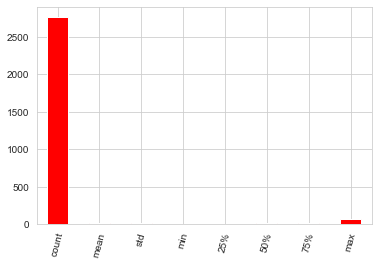







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►


<IPython.core.display.Javascript object>

column Name→→ total sulfur dioxide
Dtype= float64


This column Have Positive skewd Data


   standard deviation  Coefficient of variation   Kurtosis       mean  \
0            34.63648                  1.212083  14.297724  41.982272   

   Median Absolute Deviation  skewness     Variance  Range   IQR  
0                  23.899347  2.866653  1199.685715  283.0  34.0  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

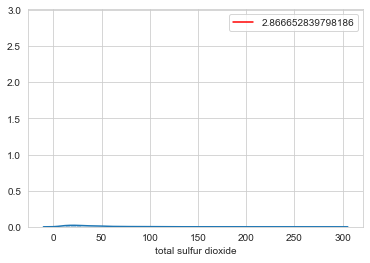

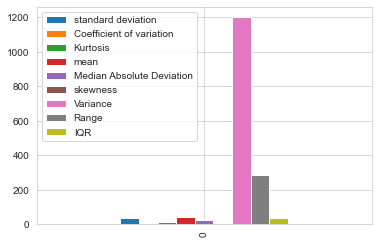

column Describe
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
count    2764.000000
mean       41.982272
std        34.636480
min         6.000000
25%        19.000000
50%        32.000000
75%        53.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

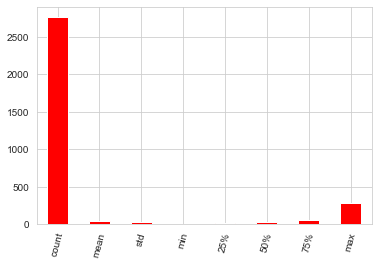







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►


<IPython.core.display.Javascript object>

column Name→→ density
Dtype= float64




   standard deviation  Coefficient of variation  Kurtosis      mean  \
0             0.00209                476.702431  0.381944  0.996394   

   Median Absolute Deviation  skewness  Variance    Range      IQR  
0                   0.001629   0.04808  0.000004  0.01362  0.00246  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

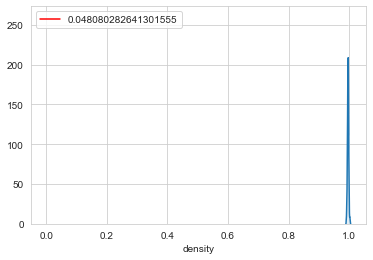

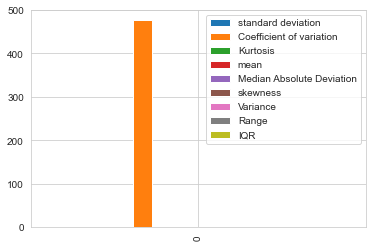

column Describe
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
count    2764.000000
mean        0.996394
std         0.002090
min         0.990070
25%         0.995140
50%         0.996400
75%         0.997600
max         1.003690
Name: density, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

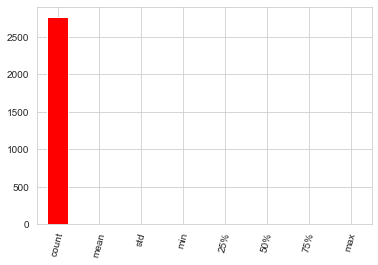







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►


<IPython.core.display.Javascript object>

column Name→→ pH
Dtype= float64




   standard deviation  Coefficient of variation  Kurtosis      mean  \
0            0.156764                 21.054351  0.686521  3.300572   

   Median Absolute Deviation  skewness  Variance  Range   IQR  
0                   0.120873  0.277408  0.024575   1.27  0.19  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

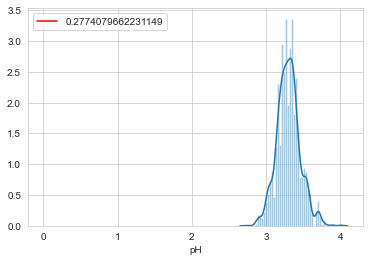

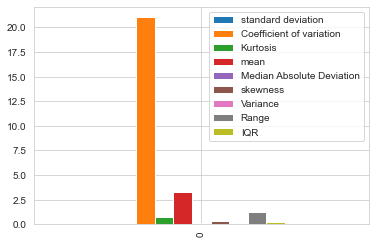

column Describe
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
count    2764.000000
mean        3.300572
std         0.156764
min         2.740000
25%         3.200000
50%         3.300000
75%         3.390000
max         4.010000
Name: pH, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

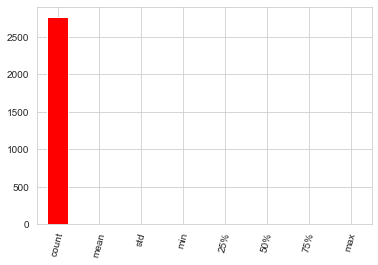







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►


<IPython.core.display.Javascript object>

column Name→→ sulphates
Dtype= float64


This column Have Positive skewd Data


   standard deviation  Coefficient of variation  Kurtosis      mean  \
0             0.16109                  4.295943   7.67752  0.692033   

   Median Absolute Deviation  skewness  Variance  Range   IQR  
0                   0.120412  1.653681   0.02595   1.67  0.19  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

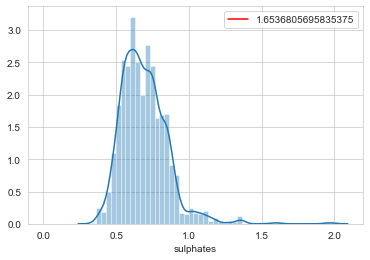

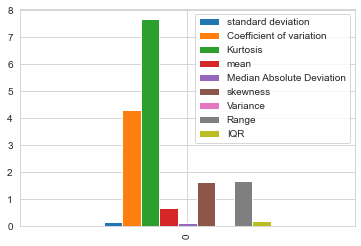

column Describe
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
count    2764.000000
mean        0.692033
std         0.161090
min         0.330000
25%         0.580000
50%         0.670000
75%         0.770000
max         2.000000
Name: sulphates, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

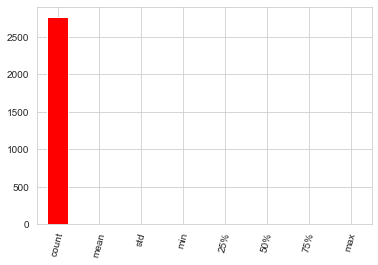







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►


<IPython.core.display.Javascript object>

column Name→→ alcohol
Dtype= float64




   standard deviation  Coefficient of variation  Kurtosis       mean  \
0            1.189701                  9.165953 -0.719045  10.904746   

   Median Absolute Deviation  skewness  Variance  Range  IQR  
0                   1.003118  0.346482  1.415389    6.5  1.9  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

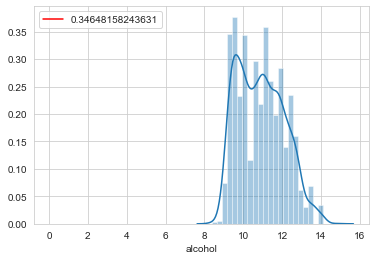

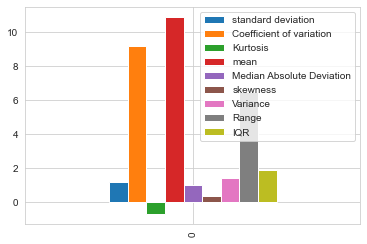

column Describe
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
count    2764.000000
mean       10.904746
std         1.189701
min         8.400000
25%         9.900000
50%        10.900000
75%        11.800000
max        14.900000
Name: alcohol, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

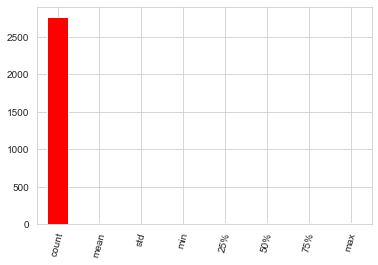







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►


<IPython.core.display.Javascript object>

column Name→→ quality
Dtype= int64




   standard deviation  Coefficient of variation  Kurtosis  mean  \
0             0.50009                  0.999819      -2.0   0.5   

   Median Absolute Deviation  skewness  Variance  Range  IQR  
0                        0.5       0.0   0.25009      1  1.0  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

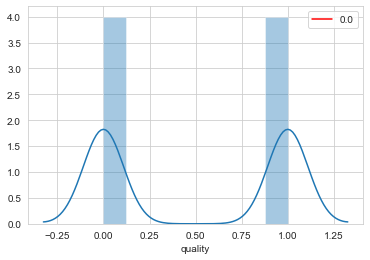

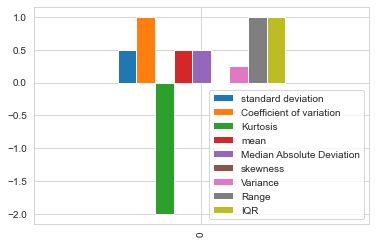

column Describe
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
count    2764.00000
mean        0.50000
std         0.50009
min         0.00000
25%         0.00000
50%         0.50000
75%         1.00000
max         1.00000
Name: quality, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

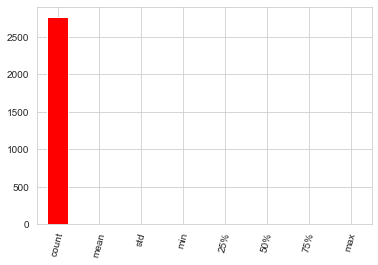







No Nan Values Are Present




►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►►


In [25]:
stats(df)

# correlation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

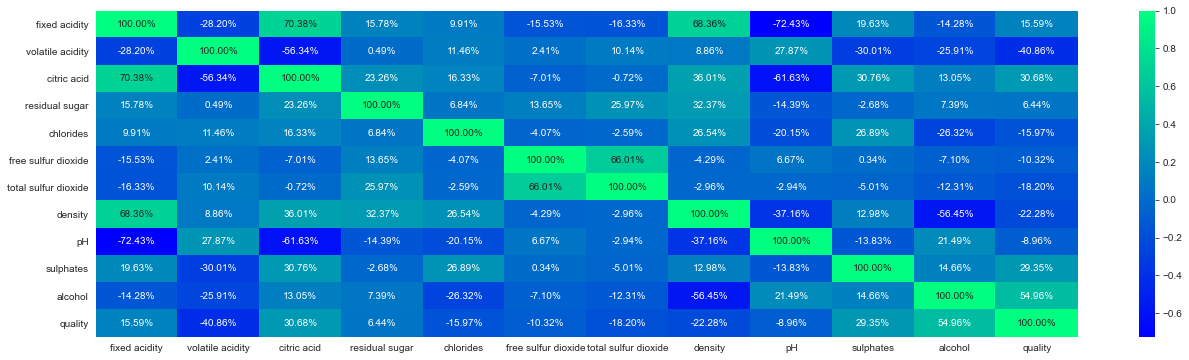

In [26]:
#check the correlation of columns with heatmap
plt.figure(figsize=[22,6])
sns.heatmap(df.corr(),fmt="0.2%",annot=True,cmap='winter')


# Outliers

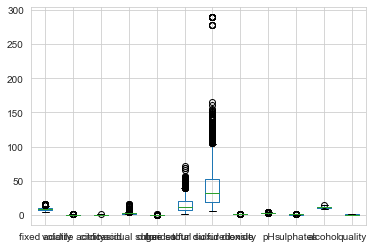

In [27]:
df.boxplot()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

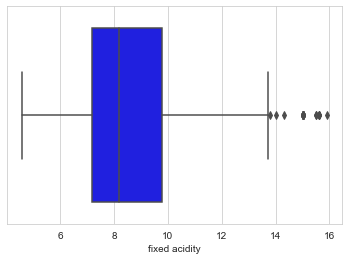

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

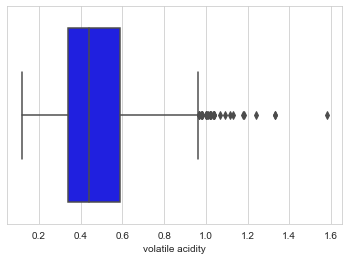

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

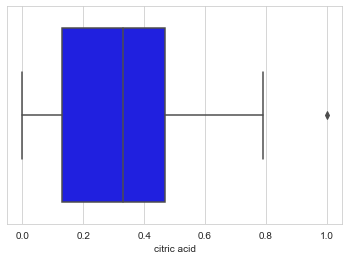

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

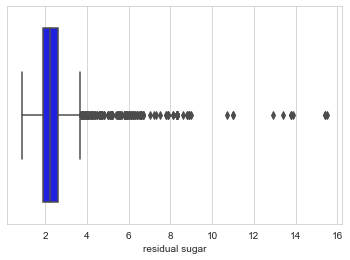

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

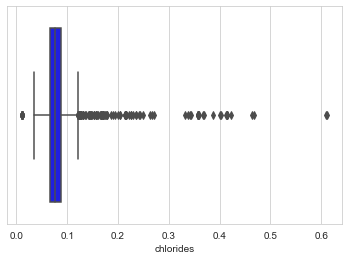

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

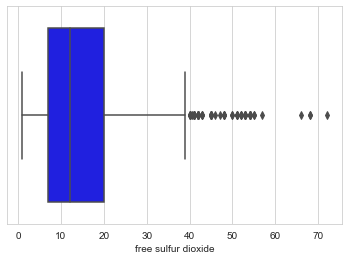

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

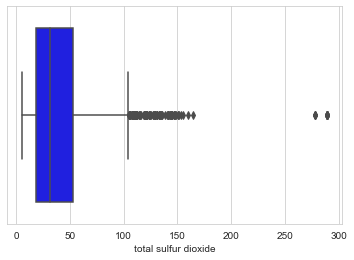

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

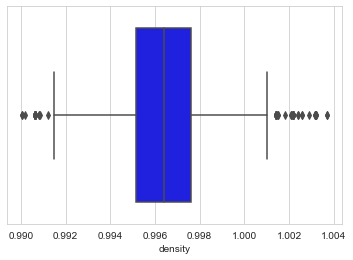

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

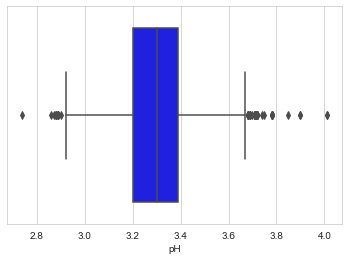

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

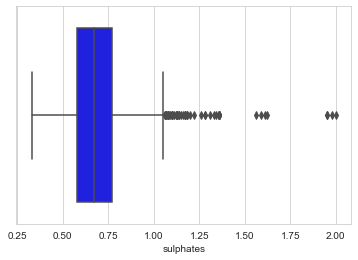

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

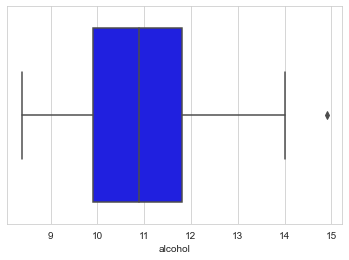

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

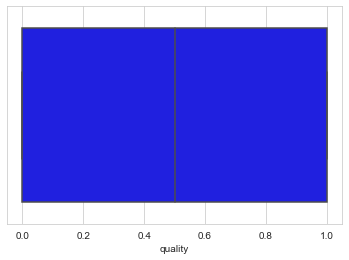

In [28]:
for i in df.columns:
    sns.boxplot(df[i],color='blue')
    plt.show()

# Univariant

In [29]:
#checking the mean of Estimated_Insects_Count cases with histplot
def mean(col):
    df[col].hist()
    m=df[col].mean()
    plt.axvline(m,linewidth=4,color='green',label=(col,' %0.2f'%m))
    plt.xlabel(col)
    plt.ylabel("count")
    plt.title(col)
    plt.legend()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

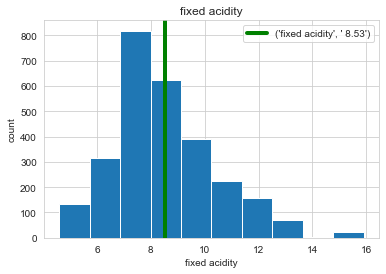

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

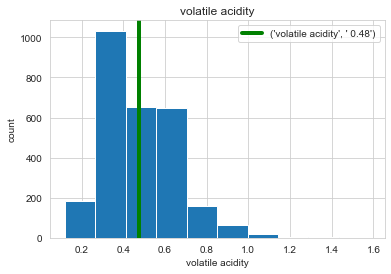

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

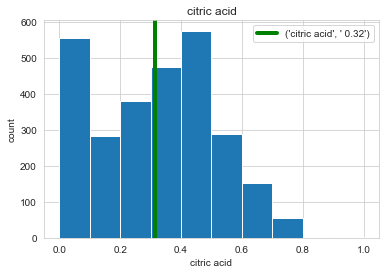

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

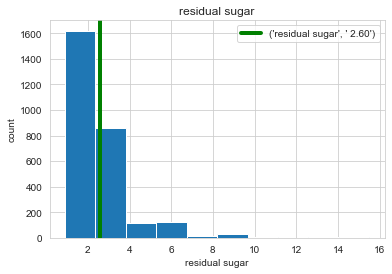

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

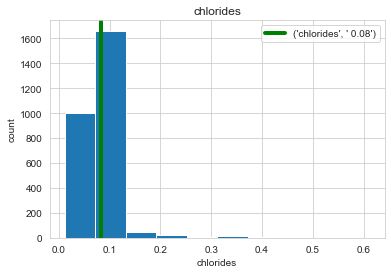

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

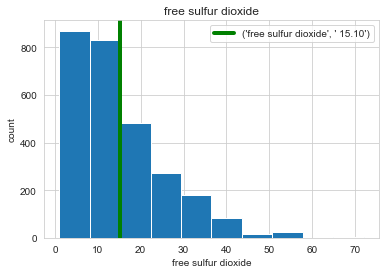

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

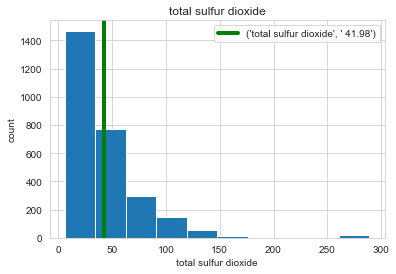

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

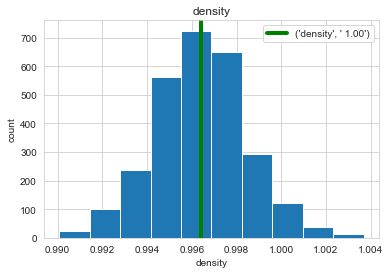

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

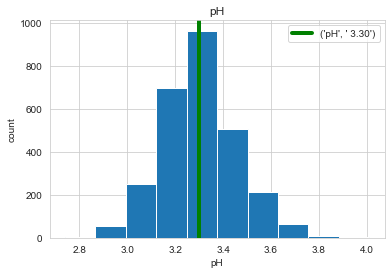

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

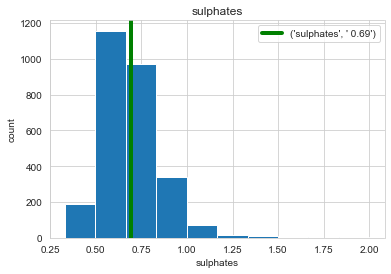

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

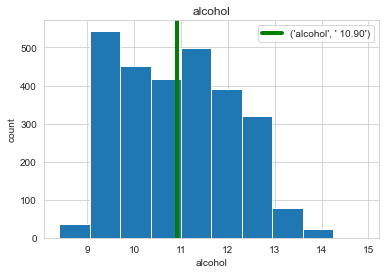

In [30]:
col=df.drop('quality',axis=1)
for i in col.columns:
    mean(i)
    plt.show()

# Baivariant  Analysis

# fixed acidity vs quality

In [31]:
px.scatter(df, x='fixed acidity', y="quality", animation_frame='fixed acidity', 
           animation_group='alcohol',
        color="quality", hover_name='fixed acidity',
           )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

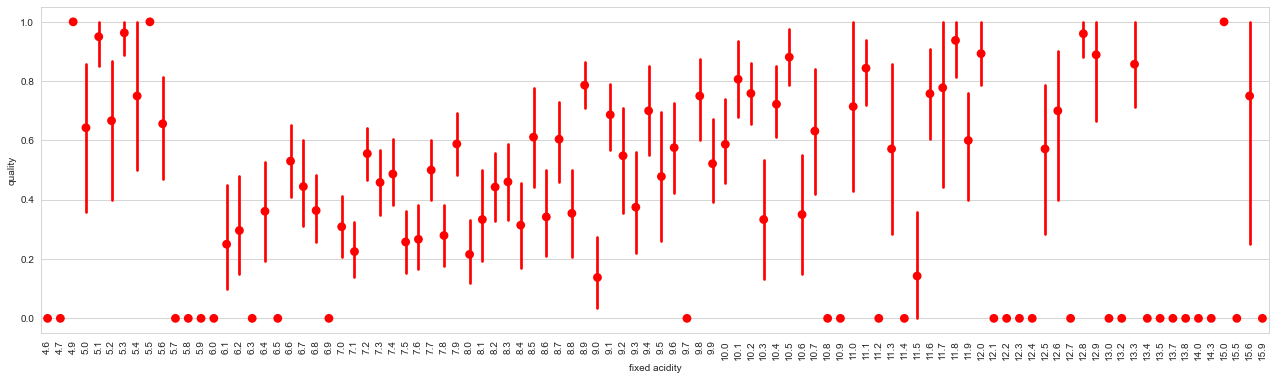

In [32]:
plt.figure(figsize=[22,6])
sns.pointplot(x="fixed acidity",y="quality",data=df,join=False,color='r')
plt.xticks(rotation = 90)
plt.show()


# volatile acidity vs quality

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1584x432 with 0 Axes>

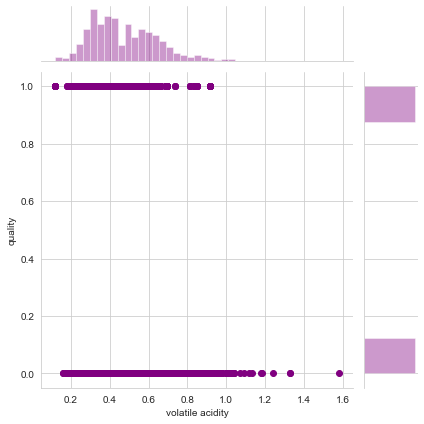

In [33]:
plt.figure(figsize=[22,6])
sns.jointplot(x='volatile acidity',y="quality",data=df,color='purple')
plt.xticks(rotation = 90)
plt.show()

# citric acid  vs quality

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

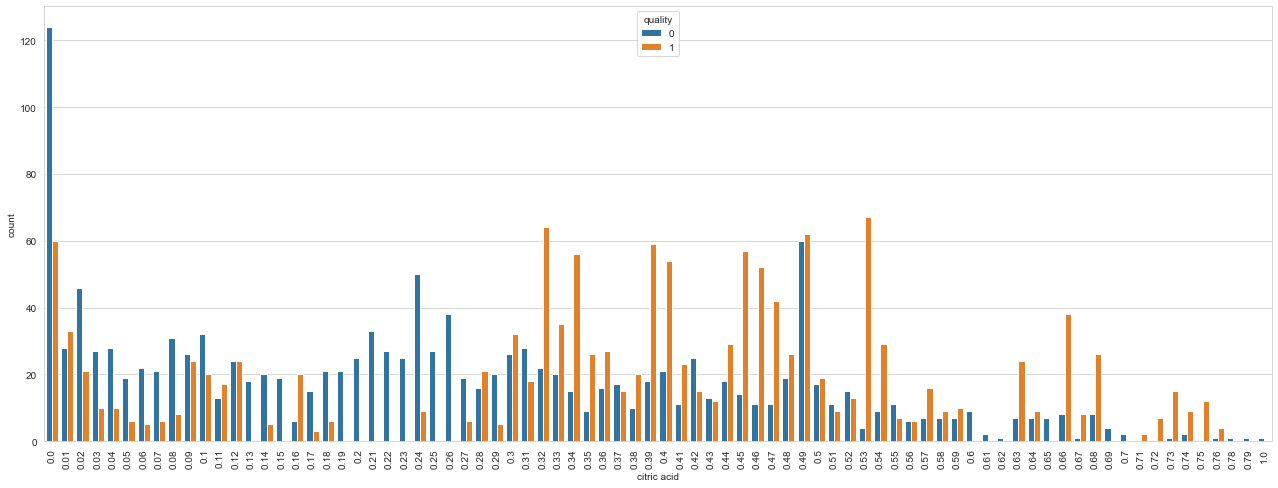

In [34]:
plt.figure(figsize=[22,8])
sns.countplot(x='citric acid',hue="quality",data=df)
plt.xticks(rotation = 90)
plt.show()

# residual sugar vs quality

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

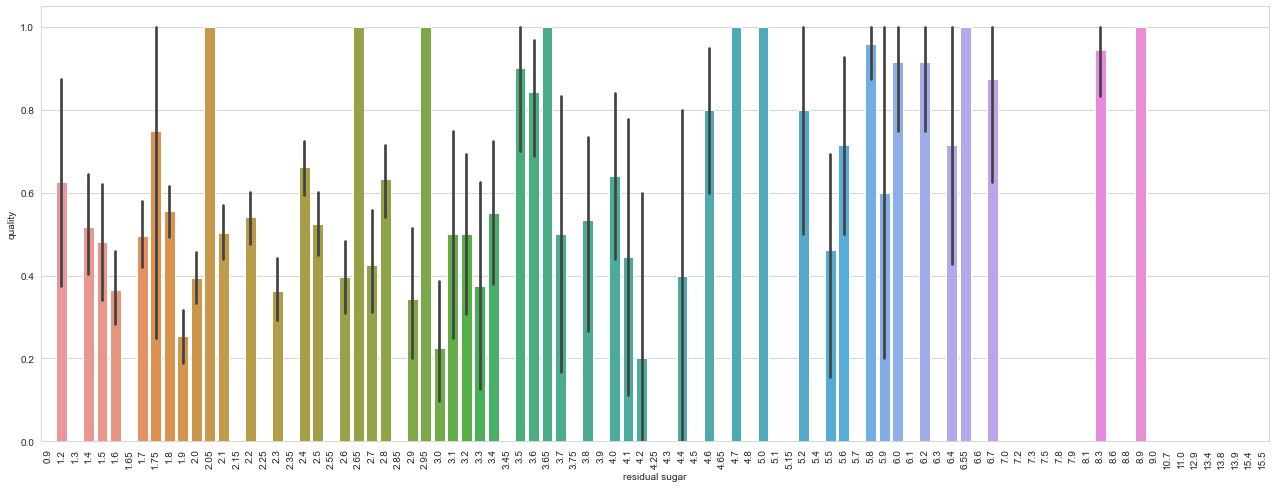

In [35]:
plt.figure(figsize=[22,8])
sns.barplot(data=df,x='residual sugar',y="quality")
plt.xticks(rotation = 90)
plt.show()

# chlorides vs quality

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

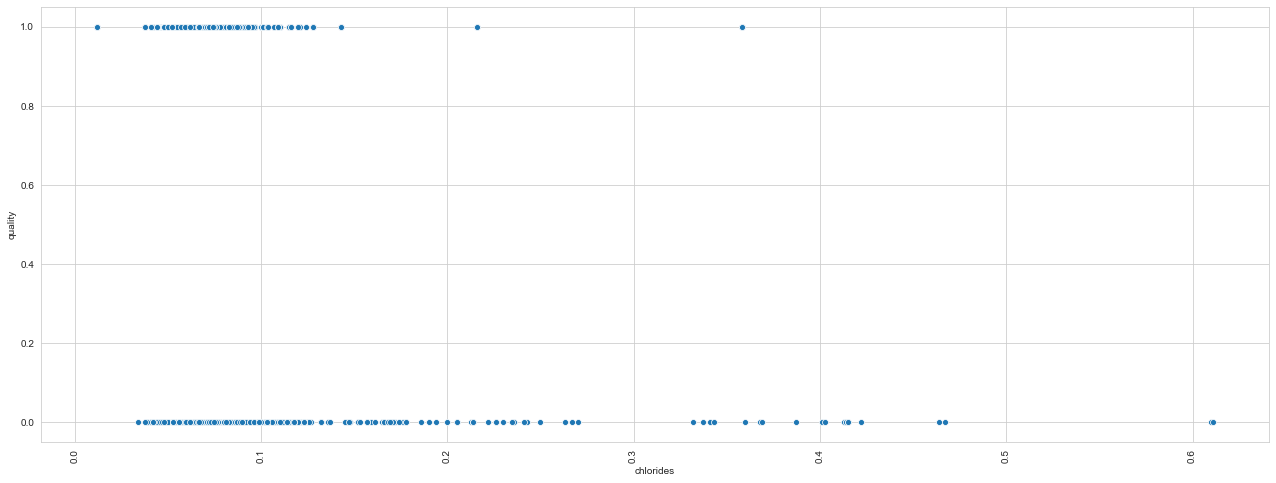

In [36]:
plt.figure(figsize=[22,8])
sns.scatterplot(data=df,x='chlorides',y="quality")
plt.xticks(rotation = 90)
plt.show()

# free sulfur dioxide vs quality

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

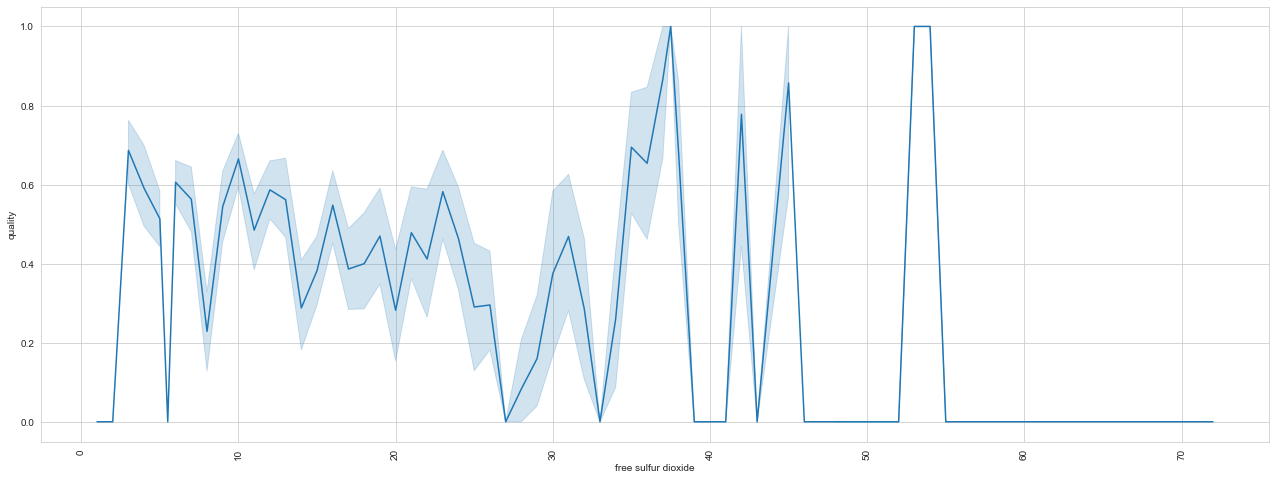

In [37]:

plt.figure(figsize=[22,8])
sns.lineplot(data=df,x='free sulfur dioxide',y="quality")
plt.xticks(rotation = 90)
plt.show()

# total sulfur dioxide vs quality

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

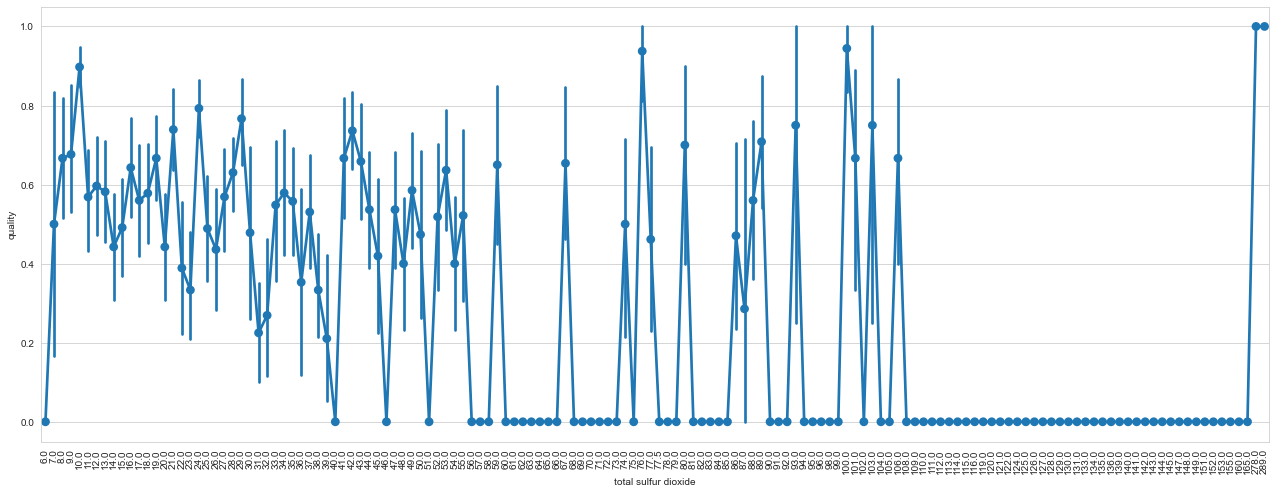

In [38]:
plt.figure(figsize=[22,8])
sns.pointplot(data=df,x='total sulfur dioxide',y="quality")
plt.xticks(rotation = 90)
plt.show()

# density vs quality

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

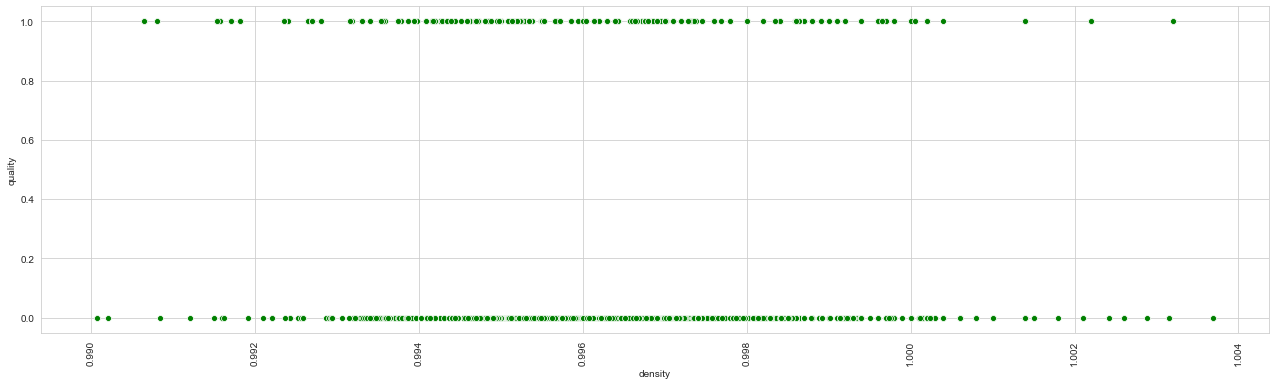

In [39]:
plt.figure(figsize=[22,6])
sns.scatterplot(x='density',y="quality",data=df,markers='o',color='g')
plt.xticks(rotation = 90)
plt.show()

# pH vs quality

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

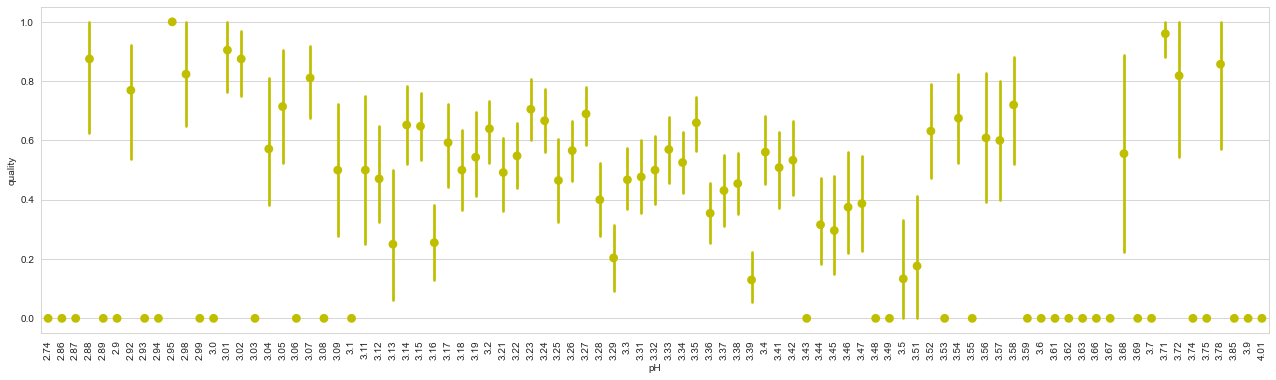

In [40]:
plt.figure(figsize=[22,6])
sns.pointplot(x='pH',y="quality",data=df,join=False,color='y',markers='o')
plt.xticks(rotation = 90)
plt.show()


# sulphates vs quality

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

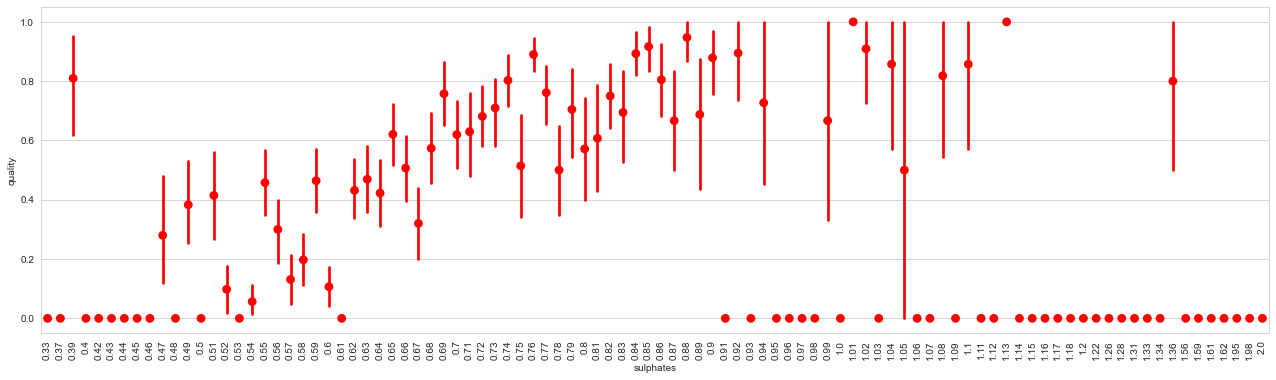

In [41]:
plt.figure(figsize=[22,6])
sns.pointplot(x='sulphates',y="quality",data=df,join=False,color='r')
plt.xticks(rotation = 90)
plt.show()

# alcohol vs quality

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

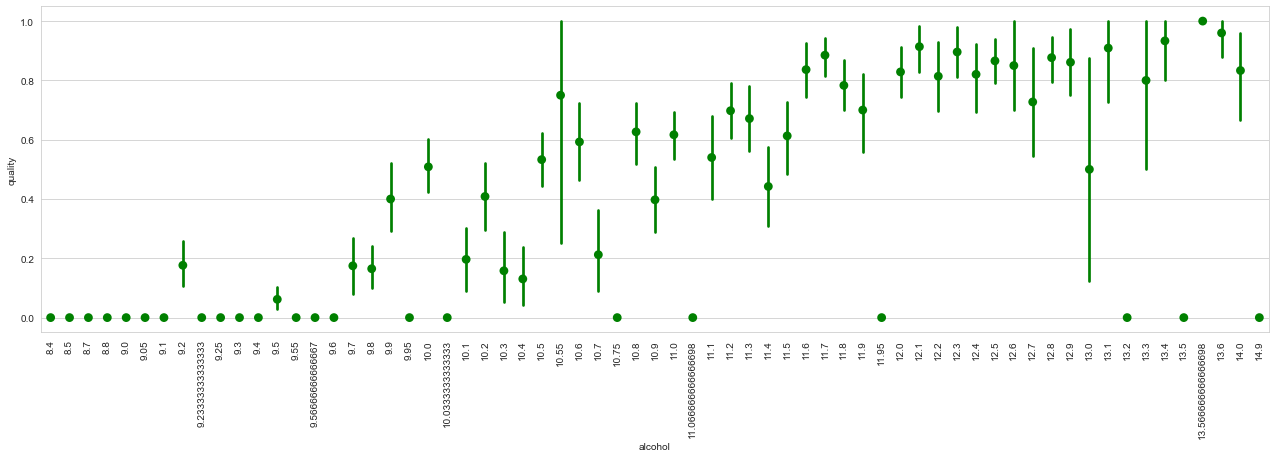

In [42]:
plt.figure(figsize=[22,6])
sns.pointplot(x='alcohol',y="quality",data=df,join=False,color='g')
plt.xticks(rotation = 90)
plt.show()

# multiVariant Analysis

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'fixed acidity wise Quality')

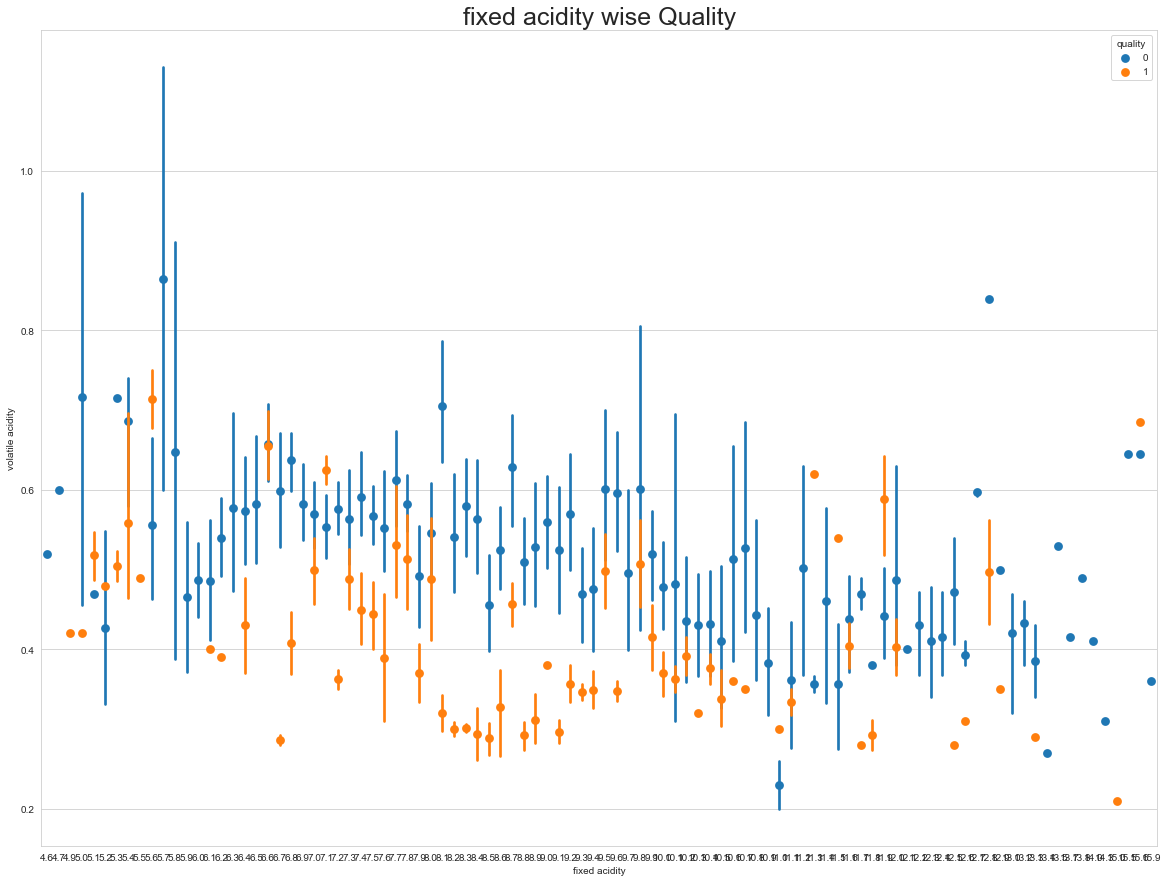

In [43]:
sns.set_style("whitegrid")
plt.figure(figsize=[20,15])
sns.pointplot(x='fixed acidity',y='volatile acidity',data=df,hue='quality', join=False)
plt.title('fixed acidity wise Quality',{"fontsize":25})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'citric acid wise Quality')

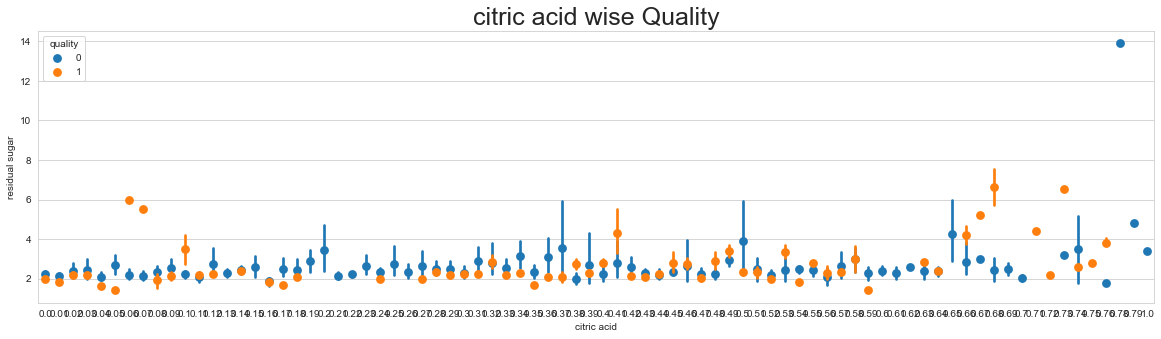

In [44]:
plt.figure(figsize=[20,5])
sns.pointplot(x='citric acid',y='residual sugar',data=df,hue='quality', join=False)
plt.title('citric acid wise Quality',{"fontsize":25})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152]),
 <a list of 153 Text major ticklabel objects>)

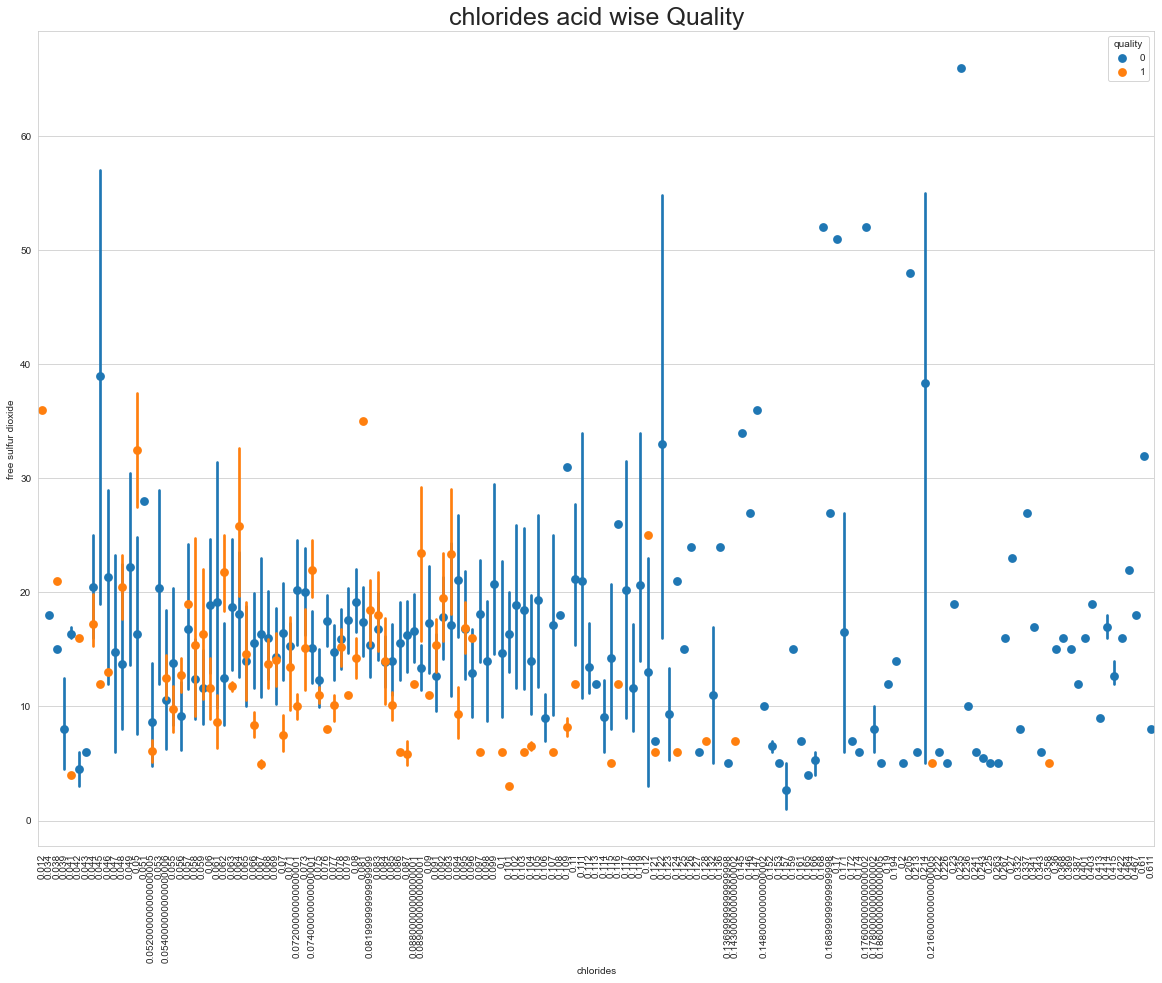

In [45]:
plt.figure(figsize=[20,15])
sns.pointplot(x='chlorides',y='free sulfur dioxide',data=df,hue='quality', join=False)
plt.title('chlorides acid wise Quality',{"fontsize":25})
plt.xticks(rotation = 90)

In [46]:
px.scatter(df, x='fixed acidity', y="quality", animation_frame='pH', 
           animation_group='alcohol',
        color="quality", hover_name='pH',
           )

<IPython.core.display.Javascript object>

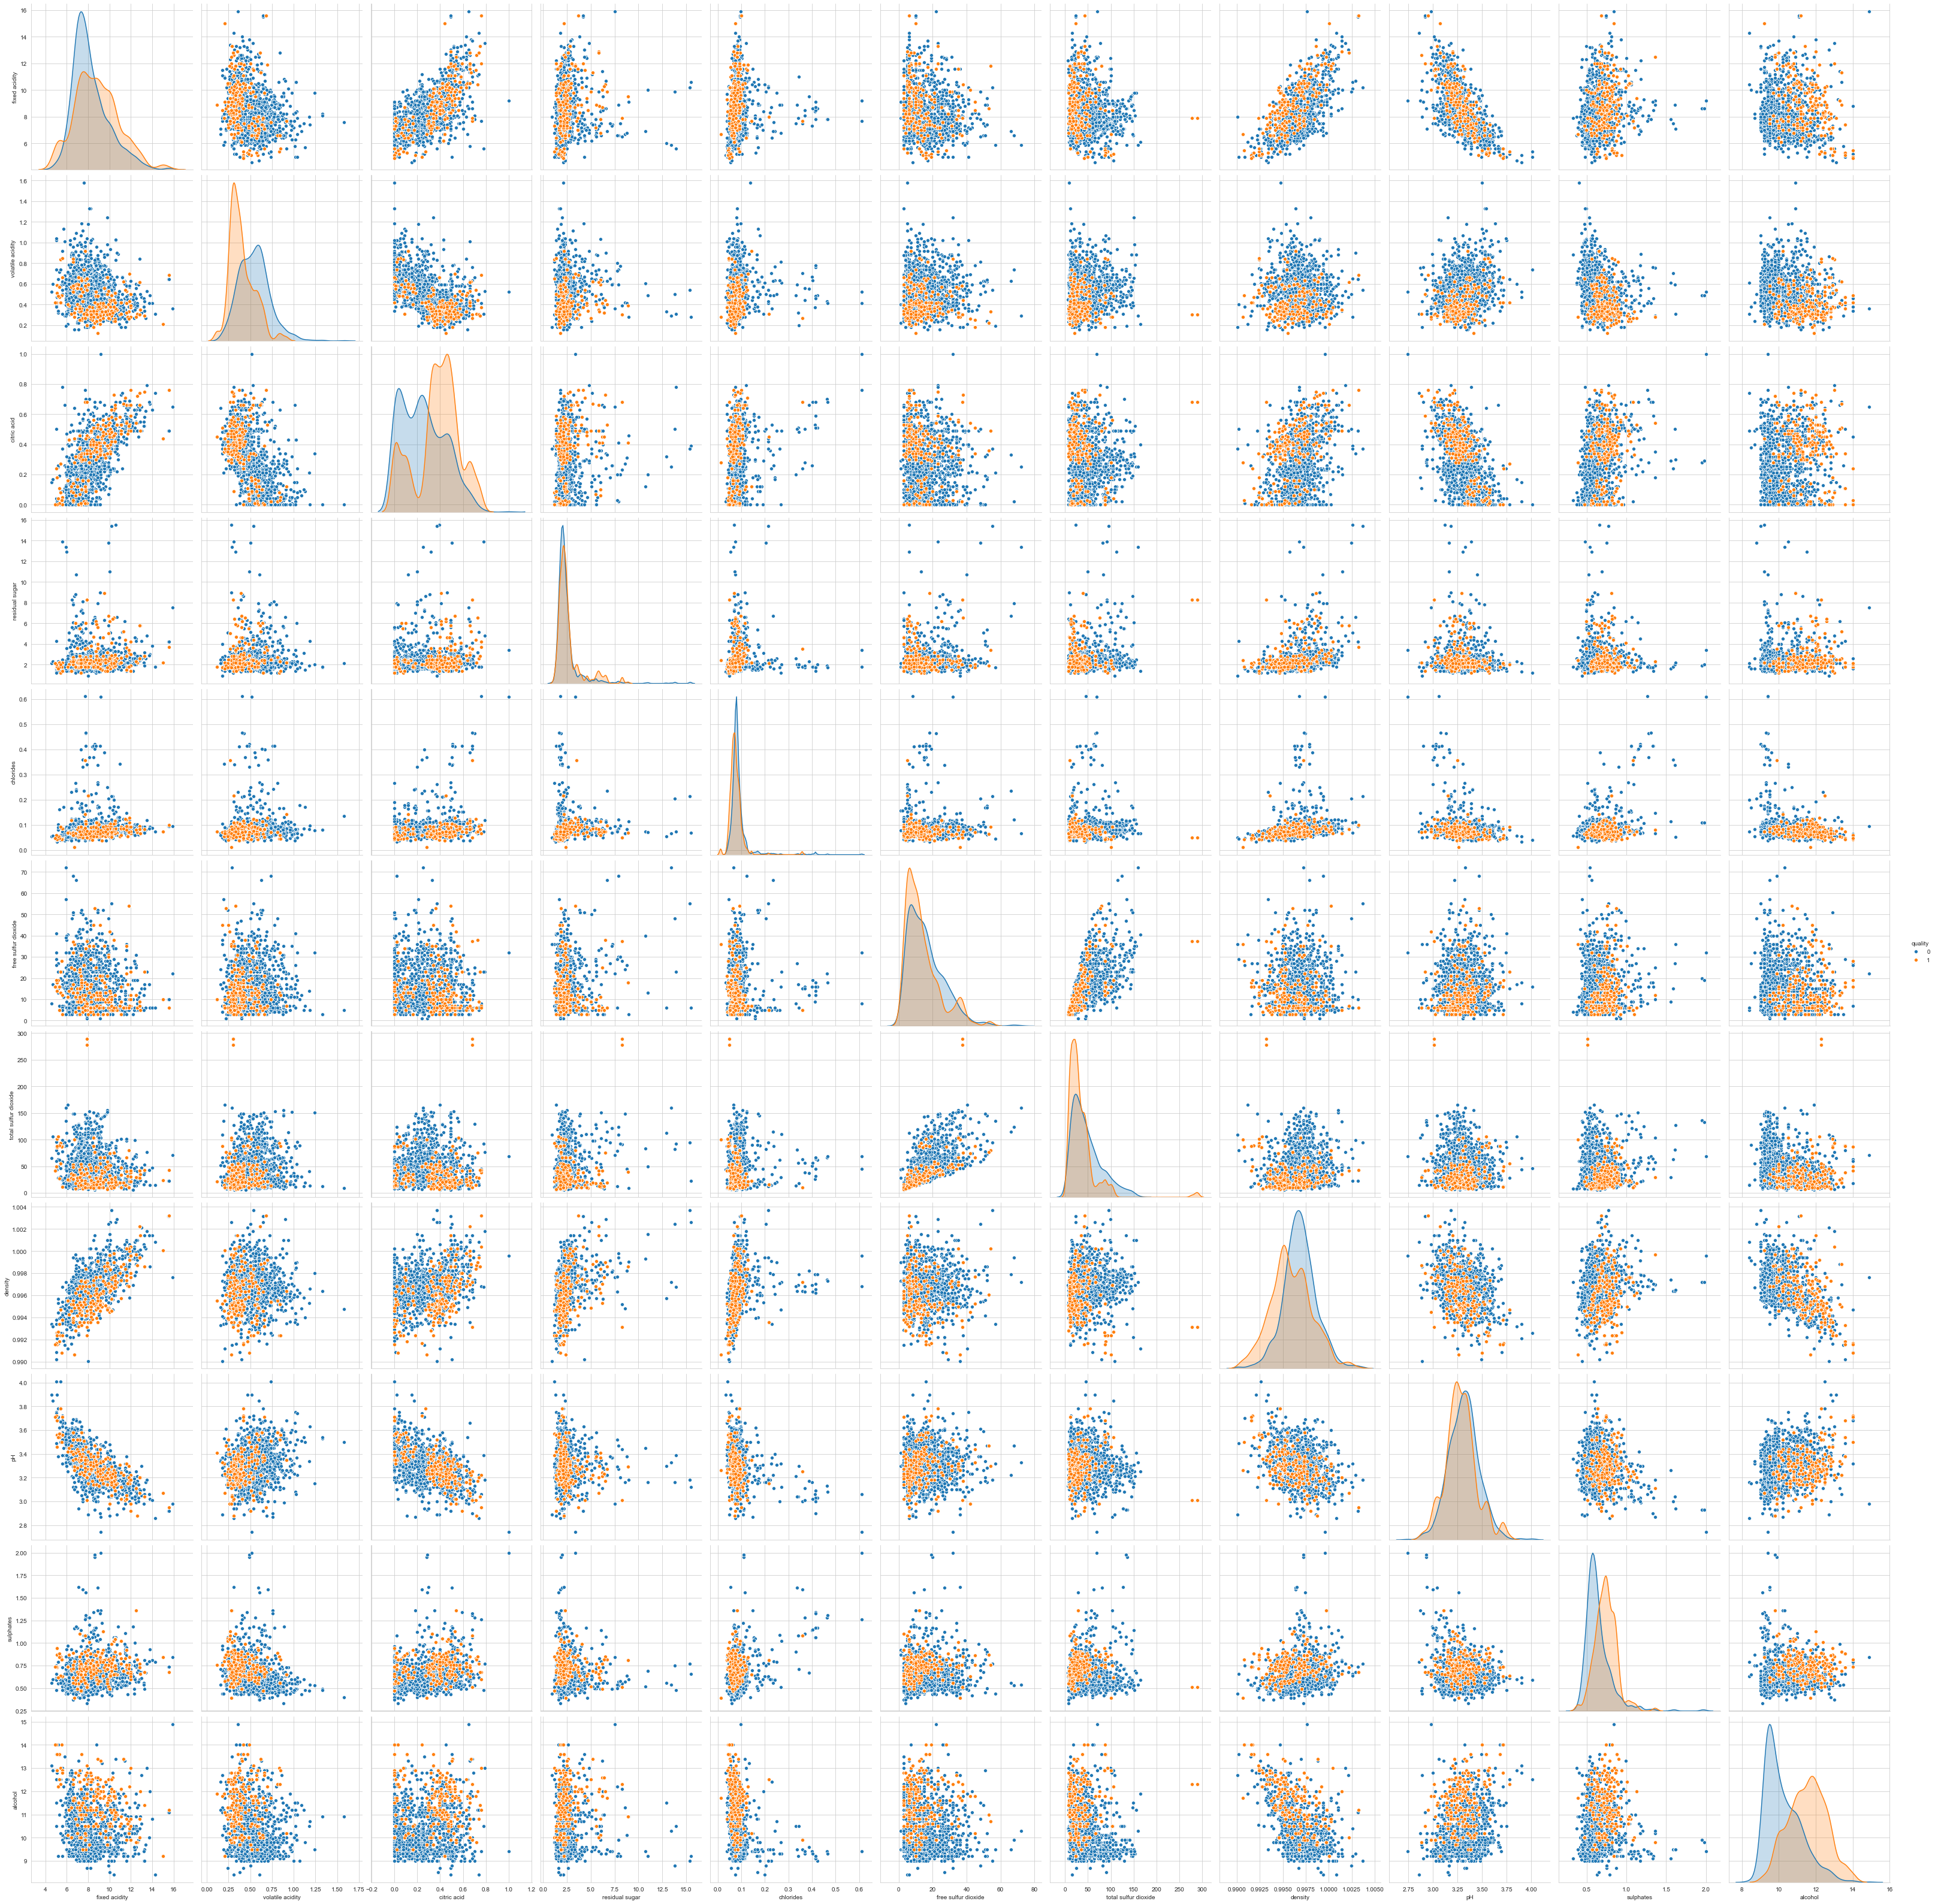

In [47]:
sns.pairplot(df,hue='quality',size=4)

# Removing the OULIERS

In [48]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
df_final=df[(z<threshold).all(axis=1)]

<IPython.core.display.Javascript object>

In [49]:
print(df_final.shape,df.shape)

(2555, 12) (2764, 12)


In [50]:
loss=((len(df)-len(df_final))/len(df))*100
loss

7.5615050651230105

# Skewness

In [51]:
df_final.skew()

fixed acidity           0.526334
volatile acidity        0.537555
citric acid             0.003906
residual sugar          2.276577
chlorides               0.982527
free sulfur dioxide     0.999842
total sulfur dioxide    1.359945
density                -0.047362
pH                      0.208463
sulphates               0.461226
alcohol                 0.332098
quality                -0.039953
dtype: float64

In [52]:
#Divede the input and output variable
df_x=df_final.drop("quality",axis=1)
y=df_final[["quality"]]

In [53]:
df_x.shape

(2555, 11)

In [54]:
y.shape

(2555, 1)

# handelling the skewness

In [55]:
for l in df_x.columns:
    if df_x[l].skew()>0.55:
        df_x[l]=np.log1p(df_x[l])
    if df_x[l].skew()<-0.55:
        df_x[l].np.log1p(df_x[l])
df_x.skew()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

fixed acidity           0.526334
volatile acidity        0.537555
citric acid             0.003906
residual sugar          1.511969
chlorides               0.840805
free sulfur dioxide    -0.054790
total sulfur dioxide    0.054992
density                -0.047362
pH                      0.208463
sulphates               0.461226
alcohol                 0.332098
dtype: float64

# Data Scaling

In [56]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler

In [57]:
#Scling the Data with Standard scaler
sc=StandardScaler()
df__x=sc.fit_transform(df_x)
X=pd.DataFrame(df__x,columns=df_x.columns)

<IPython.core.display.Javascript object>

In [58]:
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.608893          1.388433     -1.56248       -0.636666  -0.082308   
1      -0.386377          2.485969     -1.56248        0.275358   1.030385   
2      -0.386377          1.754278     -1.36089       -0.091654   0.729150   
3       1.505011         -1.172482      1.25978       -0.636666  -0.133424   
4      -0.608893          1.388433     -1.56248       -0.636666  -0.082308   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.113908              0.122732  0.735399  1.388033  -0.906365   
1             1.151362              1.138597  0.236794 -0.718364  -0.020062   
2             0.356863              0.814065  0.336515 -0.310674  -0.241638   
3             0.549607              0.972436  0.835120 -0.990157  -0.758648   
4            -0.113908              0.122732  0.735399  1.388033  -0.906365   

    alcohol  
0 -1.310883  
1 -0.971232  
2 -0.971232  
3 -0.971232  
4 -1.310883

In [59]:
y.value_counts()

quality
1          1303
0          1252
dtype: int64

# Principal Component Analysis (PCA)

In [60]:
from sklearn.decomposition import PCA
cover_matrix=PCA(n_components=len(X.columns))
cover_matrix.fit(X)

PCA(n_components=11)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

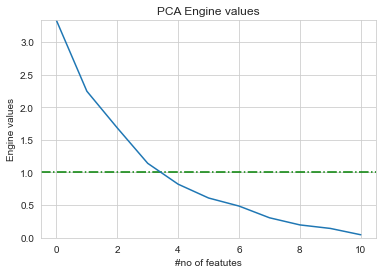

In [61]:
plt.ylabel("Engine values")
plt.xlabel("#no of featutes")
plt.title("PCA Engine values")
plt.ylim(0,max(cover_matrix.explained_variance_))
plt.axhline(y=1,color='g',linestyle='-.')
plt.plot(cover_matrix.explained_variance_)
plt.show()

In [62]:
pc=PCA(n_components=4)
x1=pc.fit_transform(X)
x=pd.DataFrame(x1)

<IPython.core.display.Javascript object>

# Model Creation

In [63]:

#In this data set we know that out target variable Quality is catagorical so we are going to take Logistic regresson
#lets make a function for getting the best random_satae for a model toget better accuracy score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import train_test_split
f_acc=[]
f_rstate=[]
rgr_n=[]
def max_acc(rgr,x,y):
    max_acc=0
    for r in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=0.20,stratify=y)
        rgr.fit(x_train,y_train)
        y_prd=rgr.predict(x_test)
        rc=accuracy_score(y_test,y_prd)
        print("Accuracy score ",rc,"coresponding to ",r)
        if rc>max_acc:
            max_acc=rc
            final_r=r
    f_acc.append(max_acc)
    f_rstate.append(final_r)
    rgr_n.append(input(""))
    print("max accuracy_ score coressponding to ♣♣→",final_r,"is♣♣",max_acc*100)

In [64]:
#lets make a function for cross_val_score
from sklearn.model_selection import cross_val_score  
cvss=[]
def k(model,x,y):
    c=cross_val_score(model,x,y,cv=5,scoring="accuracy")
    print("mean accuracy score for ",model,c.mean())
    print("Standard deviation  in accuracy score for ",model,c.std())
    print()
    print("******************************************************")
    print("After seen the cross validation score of",model,"the accuracy score mean is",c.mean())
    cvss.append(c.mean())

In [65]:
Roc_Auc=[]
def PLT(md,x,y,rd):#md=model ,x=indipendent variable,y=label,rd=random_state which one give the best accuracy 
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rd,test_size=0.20,stratify=y)
    md.fit(x_train,y_train)
    pre=md.predict(x_test)
    acc=accuracy_score(y_test,pre)
    print(acc)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    Roc_Auc.append(roc_auc)
    print ('roc_auc_score = ',roc_auc)
    cm=confusion_matrix(y_test,pre)
    print(cm)
    sns.heatmap(cm,annot=True,cmap='rainbow',cbar=False)
    print()
    cr=classification_report(y_test,pre)
    print()
    print()
    print()
    plt.figure(figsize=[20,50],facecolor='purple')
    plt.subplot(912)
    plt.title(md,{"fontsize":22})
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print(cr,"\n","☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼")

In [66]:
trn_scr=[]
def train_loss(rgr,x,y,rd):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rd,test_size=0.20,stratify=y)
    rgr.fit(x_train,y_train)
    scr=rgr.score(x_train,y_train)
    trn_loss=1-scr
    trn_scr.append(trn_loss)
    print(trn_loss)

# LogisticRegression

In [67]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
max_acc(lg,x,y)

Accuracy score  0.8062622309197651 coresponding to  42
Accuracy score  0.8003913894324853 coresponding to  43
Accuracy score  0.7847358121330724 coresponding to  44
Accuracy score  0.786692759295499 coresponding to  45
Accuracy score  0.7847358121330724 coresponding to  46
Accuracy score  0.8160469667318982 coresponding to  47
Accuracy score  0.786692759295499 coresponding to  48
Accuracy score  0.8062622309197651 coresponding to  49
Accuracy score  0.786692759295499 coresponding to  50
Accuracy score  0.7886497064579256 coresponding to  51
Accuracy score  0.7690802348336595 coresponding to  52
Accuracy score  0.8043052837573386 coresponding to  53
Accuracy score  0.821917808219178 coresponding to  54
Accuracy score  0.7945205479452054 coresponding to  55
Accuracy score  0.8140900195694716 coresponding to  56
Accuracy score  0.8062622309197651 coresponding to  57
Accuracy score  0.8082191780821918 coresponding to  58
Accuracy score  0.8043052837573386 coresponding to  59
Accuracy score

In [68]:
#lets  check cross_val_score of the model
k(lg,x,y)

mean accuracy score for  LogisticRegression() 0.7898238747553815
Standard deviation  in accuracy score for  LogisticRegression() 0.048294981968879276

******************************************************
After seen the cross validation score of LogisticRegression() the accuracy score mean is 0.7898238747553815


0.8336594911937377
roc_auc_score =  0.8329501915708812
[[200  50]
 [ 35 226]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

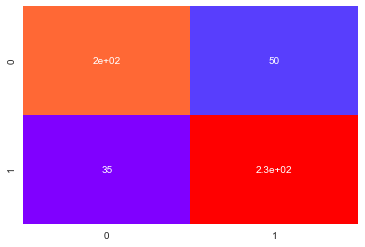

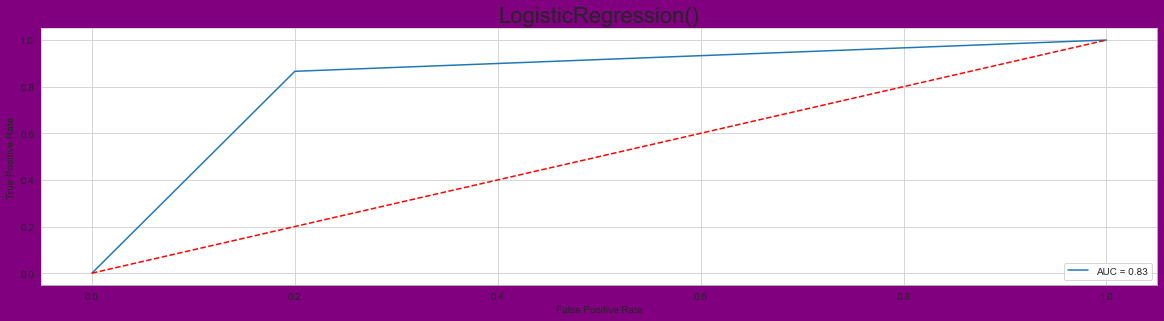

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       250
           1       0.82      0.87      0.84       261

    accuracy                           0.83       511
   macro avg       0.83      0.83      0.83       511
weighted avg       0.83      0.83      0.83       511
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [69]:
PLT(lg,x,y,68 )

In [70]:
train_loss(lg,x,y,68)

0.2059686888454012


# KNeighborsClassifier

In [71]:
from sklearn.model_selection import *
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
parameters={"n_jobs":range(1,30,2),"n_neighbors":range(0,50,3)}
Gk=GridSearchCV(kn,parameters,cv=5,scoring="accuracy")
Gk.fit(x,y)
Gk.best_params_#finding the best hyperparameter with Gridsearchcv

{'n_jobs': 1, 'n_neighbors': 3}

In [72]:
knn=KNeighborsClassifier(n_jobs=1,n_neighbors=3)
max_acc(knn,x,y)

Accuracy score  0.9412915851272016 coresponding to  42
Accuracy score  0.9041095890410958 coresponding to  43
Accuracy score  0.9334637964774951 coresponding to  44
Accuracy score  0.9354207436399217 coresponding to  45
Accuracy score  0.9354207436399217 coresponding to  46
Accuracy score  0.9197651663405088 coresponding to  47
Accuracy score  0.9432485322896281 coresponding to  48
Accuracy score  0.9197651663405088 coresponding to  49
Accuracy score  0.9334637964774951 coresponding to  50
Accuracy score  0.9334637964774951 coresponding to  51
Accuracy score  0.9315068493150684 coresponding to  52
Accuracy score  0.9452054794520548 coresponding to  53
Accuracy score  0.9373776908023483 coresponding to  54
Accuracy score  0.9158512720156555 coresponding to  55
Accuracy score  0.9393346379647749 coresponding to  56
Accuracy score  0.9354207436399217 coresponding to  57
Accuracy score  0.9256360078277887 coresponding to  58
Accuracy score  0.9334637964774951 coresponding to  59
Accuracy s

In [73]:
#lets  check cross_val_score of the model
k(knn,x,y)

mean accuracy score for  KNeighborsClassifier(n_jobs=1, n_neighbors=3) 0.9060665362035225
Standard deviation  in accuracy score for  KNeighborsClassifier(n_jobs=1, n_neighbors=3) 0.04372364788655636

******************************************************
After seen the cross validation score of KNeighborsClassifier(n_jobs=1, n_neighbors=3) the accuracy score mean is 0.9060665362035225


0.9549902152641878
roc_auc_score =  0.9540842911877394
[[228  22]
 [  1 260]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

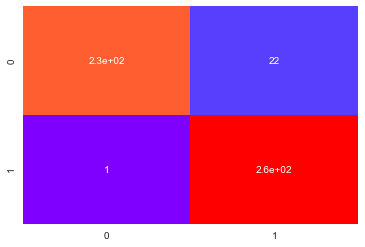

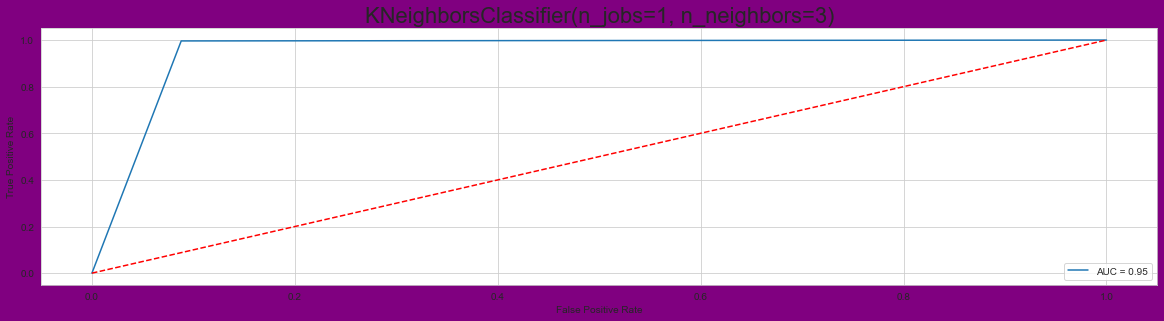

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       250
           1       0.92      1.00      0.96       261

    accuracy                           0.95       511
   macro avg       0.96      0.95      0.95       511
weighted avg       0.96      0.95      0.95       511
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [74]:
PLT(knn,x,y,98)

In [75]:
train_loss(knn,x,y,98)

0.03767123287671237


# DecisionTreeClassifier

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dc=DecisionTreeClassifier()
parameters={"criterion":["gini", "entropy"],"max_depth":range(2,10,1),"min_samples_leaf":range(1,10,2)}
grd=GridSearchCV(dc,parameters,cv=5,scoring="accuracy")
grd.fit(x,y)
grd.best_params_


{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1}

In [78]:
Dc=DecisionTreeClassifier(criterion='gini',max_depth=9,min_samples_leaf=1)
max_acc(Dc,x,y)

Accuracy score  0.9217221135029354 coresponding to  42
Accuracy score  0.9060665362035225 coresponding to  43
Accuracy score  0.9060665362035225 coresponding to  44
Accuracy score  0.9119373776908023 coresponding to  45
Accuracy score  0.913894324853229 coresponding to  46
Accuracy score  0.9021526418786693 coresponding to  47
Accuracy score  0.9256360078277887 coresponding to  48
Accuracy score  0.9178082191780822 coresponding to  49
Accuracy score  0.923679060665362 coresponding to  50
Accuracy score  0.9275929549902152 coresponding to  51
Accuracy score  0.9217221135029354 coresponding to  52
Accuracy score  0.9315068493150684 coresponding to  53
Accuracy score  0.9471624266144814 coresponding to  54
Accuracy score  0.9197651663405088 coresponding to  55
Accuracy score  0.9354207436399217 coresponding to  56
Accuracy score  0.913894324853229 coresponding to  57
Accuracy score  0.9256360078277887 coresponding to  58
Accuracy score  0.923679060665362 coresponding to  59
Accuracy score

In [79]:
#lets  check cross_val_score of the model
k(Dc,x,y)

mean accuracy score for  DecisionTreeClassifier(max_depth=9) 0.89706457925636
Standard deviation  in accuracy score for  DecisionTreeClassifier(max_depth=9) 0.031325828264209384

******************************************************
After seen the cross validation score of DecisionTreeClassifier(max_depth=9) the accuracy score mean is 0.89706457925636


0.9452054794520548
roc_auc_score =  0.9440000000000001
[[222  28]
 [  0 261]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

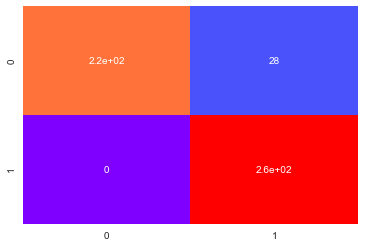

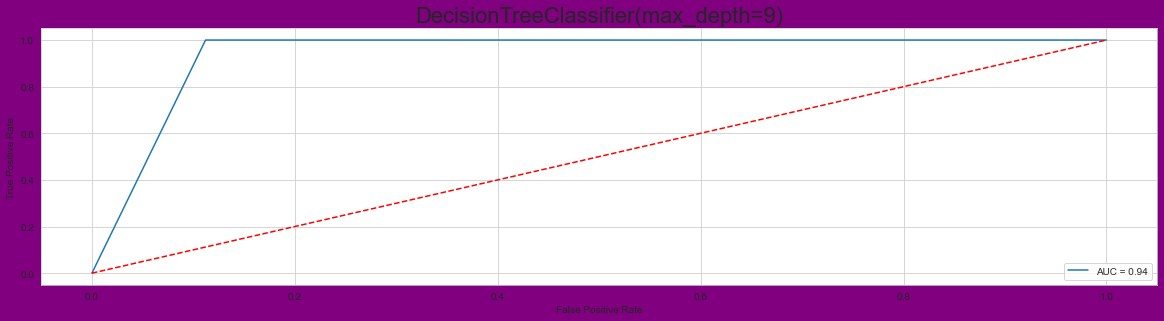

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       250
           1       0.90      1.00      0.95       261

    accuracy                           0.95       511
   macro avg       0.95      0.94      0.94       511
weighted avg       0.95      0.95      0.94       511
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [80]:
PLT(Dc,x,y,54 )

In [81]:
train_loss(Dc,x,y,54 )

0.03718199608610573


# RandomForestClassifier

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
Rdc=RandomForestClassifier()
parameters={"n_estimators":range(1,1000,200)}
grd_rdc=GridSearchCV(Rdc,parameters,cv=5,scoring='accuracy')
grd_rdc.fit(x,y)
grd_rdc.best_params_

{'n_estimators': 601}

In [84]:
rdclf=RandomForestClassifier(n_estimators=601)
max_acc(rdclf,x,y)

Accuracy score  0.9628180039138943 coresponding to  42
Accuracy score  0.9549902152641878 coresponding to  43
Accuracy score  0.958904109589041 coresponding to  44
Accuracy score  0.9510763209393346 coresponding to  45
Accuracy score  0.9530332681017613 coresponding to  46
Accuracy score  0.9706457925636007 coresponding to  47
Accuracy score  0.958904109589041 coresponding to  48
Accuracy score  0.9608610567514677 coresponding to  49
Accuracy score  0.9628180039138943 coresponding to  50
Accuracy score  0.9510763209393346 coresponding to  51
Accuracy score  0.9471624266144814 coresponding to  52
Accuracy score  0.9667318982387475 coresponding to  53
Accuracy score  0.9863013698630136 coresponding to  54
Accuracy score  0.9549902152641878 coresponding to  55
Accuracy score  0.9765166340508806 coresponding to  56
Accuracy score  0.9608610567514677 coresponding to  57
Accuracy score  0.958904109589041 coresponding to  58
Accuracy score  0.9726027397260274 coresponding to  59
Accuracy scor

In [85]:
#lets  check cross_val_score of the model
k(rdclf,x,y)

mean accuracy score for  RandomForestClassifier(n_estimators=601) 0.9479452054794522
Standard deviation  in accuracy score for  RandomForestClassifier(n_estimators=601) 0.02940895091063671

******************************************************
After seen the cross validation score of RandomForestClassifier(n_estimators=601) the accuracy score mean is 0.9479452054794522


0.9482528735632184

0.9882583170254403
roc_auc_score =  0.988
[[244   6]
 [  0 261]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

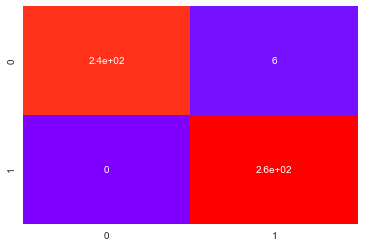

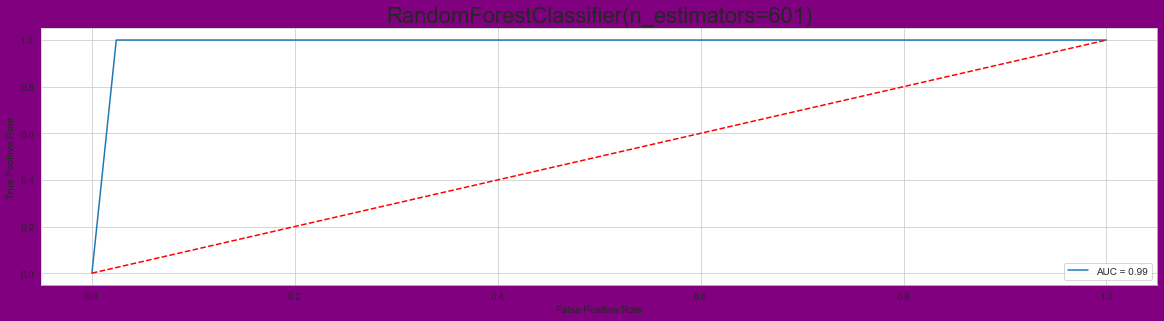

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       250
           1       0.98      1.00      0.99       261

    accuracy                           0.99       511
   macro avg       0.99      0.99      0.99       511
weighted avg       0.99      0.99      0.99       511
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [90]:
PLT(rdclf,x,y,54)

In [91]:
train_loss(rdclf,x,y,54)

0.0


# XGBClassifier

In [92]:
import xgboost

In [93]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
max_acc(xgb,x,y)

Accuracy score  0.9686888454011742 coresponding to  42
Accuracy score  0.9569471624266145 coresponding to  43
Accuracy score  0.9530332681017613 coresponding to  44
Accuracy score  0.9452054794520548 coresponding to  45
Accuracy score  0.9510763209393346 coresponding to  46
Accuracy score  0.958904109589041 coresponding to  47
Accuracy score  0.9686888454011742 coresponding to  48
Accuracy score  0.9667318982387475 coresponding to  49
Accuracy score  0.9667318982387475 coresponding to  50
Accuracy score  0.9510763209393346 coresponding to  51
Accuracy score  0.9452054794520548 coresponding to  52
Accuracy score  0.9686888454011742 coresponding to  53
Accuracy score  0.974559686888454 coresponding to  54
Accuracy score  0.949119373776908 coresponding to  55
Accuracy score  0.9784735812133072 coresponding to  56
Accuracy score  0.9686888454011742 coresponding to  57
Accuracy score  0.9647749510763209 coresponding to  58
Accuracy score  0.9608610567514677 coresponding to  59
Accuracy scor

In [94]:
#lets  check cross_val_score of the model
k(xgb,x,y)

mean accuracy score for  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) 0.9416829745596867
Standard deviation  in accuracy score for  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, mon

0.9784735812133072
roc_auc_score =  0.978
[[239  11]
 [  0 261]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

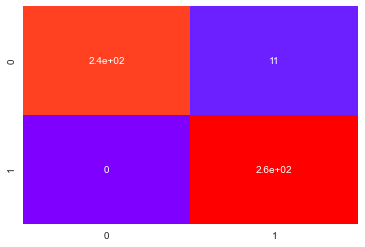

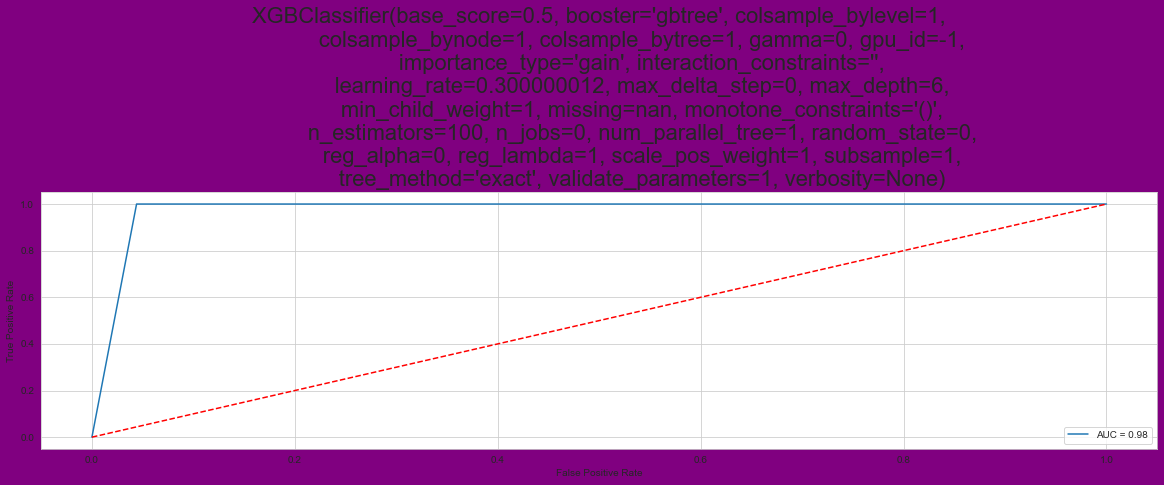

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       250
           1       0.96      1.00      0.98       261

    accuracy                           0.98       511
   macro avg       0.98      0.98      0.98       511
weighted avg       0.98      0.98      0.98       511
 
 ☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼☼


In [95]:
PLT(xgb,x,y,56)

In [96]:
train_loss(xgb,x,y,56)

0.0


In [97]:
Result=pd.DataFrame({"MODEL":rgr_n,"MOdel_Accuracy":f_acc,"Random_State":f_rstate,"CV_Score":cvss,
                    "AUC_ROC":Roc_Auc,"Train_Loss_Score":trn_scr})

<IPython.core.display.Javascript object>

In [98]:
Result

MODEL  MOdel_Accuracy  Random_State  CV_Score   AUC_ROC  \
0      LogisticRegression        0.833659            68  0.789824  0.832950   
1    KNeighborsClassifier        0.954990            98  0.906067  0.954084   
2  DecisionTreeClassifier        0.947162            54  0.897065  0.944000   
3  RandomForestClassifier        0.986301            54  0.947945  0.988000   
4           XGBClassifier        0.978474            56  0.941683  0.978000   

   Train_Loss_Score  
0          0.205969  
1          0.037671  
2          0.037182  
3          0.000000  
4          0.000000

In [99]:
Result.iplot()

In [100]:
#After seen above results am going with RandomForestClassifier its performing well in this dataset.
#with the random state of 89
rdclf=RandomForestClassifier(n_estimators=601)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=89,test_size=0.20,stratify=y)
rdclf.fit(x_train,y_train)
y_prd=rdclf.predict(x_test)
acc=accuracy_score(y_test,y_prd)
print("accuracy_score",acc*100)
print()
print()
print("CONFUSION_MATRIX OF RandomForestClassifier  →","\n",confusion_matrix(y_test,y_prd))
print()
print("classification_reportOF RandomForestClassifier"  ,"\n",
      classification_report(y_test,y_prd))

accuracy_score 95.10763209393346


CONFUSION_MATRIX OF RandomForestClassifier  → 
 [[228  22]
 [  3 258]]

classification_reportOF RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.99      0.91      0.95       250
           1       0.92      0.99      0.95       261

    accuracy                           0.95       511
   macro avg       0.95      0.95      0.95       511
weighted avg       0.95      0.95      0.95       511



In [101]:
#saving the Model
import joblib #importing the job
  
# Save the model as a pickle in a file 
joblib.dump(rdclf,'wine_quality.pkl')

['wine_quality.pkl']

In [102]:
#saving the predict as csv
joblib.dump(rdclf,'wine_quality.csv')

['wine_quality.csv']

In [103]:
#lets call the model and predict it
Model=joblib.load('wine_quality.csv')
Model.predict(x_test)

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,